In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
class Agnes(object):
    def __init__(self, data, k):
        if not isinstance(data, pd.DataFrame): # restrict the format of data
            self.data = pd.DataFrame(data)
        else:
            self.data = data
        self.k = k # number of clusters
        self.m = len(self.data) # number of examples
        
        # initialize a culster dict, each example is a cluster
        self.datadict = {}
        for i in range(self.m):
            self.datadict[i] = {i}
        
        # initialize the cluster-distance matrix
        self.M = [[np.inf for i in range(self.m)] for j in range(self.m)]
        for i in range(len(self.data)):
            for j in range(i+1, len(self.data)):
                dis = pow(sum(pow(self.data.iloc[i] - self.data.iloc[j], 2)), 0.5) # calculate distance
                self.M[i][j] = dis
                self.M[j][i] = dis

    # define a function to calculate the distance between cluster
    @staticmethod
    def distance(set1, set2, row_data): 
        dis = []
        for i in set1:
            for j in set2:
                if i == j:
                    dist = np.inf
                else:
                    dist = pow(sum(pow(row_data.iloc[i] - row_data.iloc[j],2)), 0.5) # 计算距离
                dis.append(dist)
        return max(dis)

    def train(self):
        q = self.m
        self.matrix = pd.DataFrame(self.M)
        self.output = [0 for i in range(self.m)] # define a color list
        while q > self.k:
            if (self.m - q + 1 % 5) == 0:
                print("===================正在进行第{}次训练=========================".format(self.m - q + 1))
            lse = self.matrix.idxmin()
            temp = []
            for i in lse.index:
                temp.append(self.matrix[i].min())
            index = temp.index(min(temp))
            column = lse[temp.index(min(temp))]
            self.datadict[index] = self.datadict[index] | self.datadict[column]
            # 更新簇列表
            if column != q-1:
                for j in range(column, q-1):
                    self.datadict[j] = self.datadict[j+1]
                self.datadict.pop(q-1)
            else:
                self.datadict.pop(q-1)
            # 更新距离矩阵            
            self.matrix = self.matrix.drop(index=column, columns=column)
            self.matrix.index=list(range(q-1))
            self.matrix.columns=list(range(q-1))
            for j in range(q-1):
                self.matrix.iloc[index,j] = self.distance(self.datadict[index], self.datadict[j], self.data)
                self.matrix.iloc[j, index] = self.matrix.iloc[index,j]   
            # 更新簇数
            q = q - 1
        #输出颜色列表
        for k,v in self.datadict.items(): 
            for s in v:
                self.output[s] = k
            
    def ag_plot(self):
        pca = PCA(n_components=2)   #降低成两维绘图 
        newData = pca.fit_transform(self.data)  
        x = [n[0] for n in newData]  
        y = [n[1] for n in newData]
        plt.scatter(x, y, c=self.output, s=50, marker='o')  
        plt.title("AGNES")    
        plt.xlabel("x")  
        plt.ylabel("y")    
        plt.show()

In [3]:
data = pd.read_excel("cluster.xlsx")

In [4]:
ag = Agnes(data, 4)

In [5]:
ag.train()

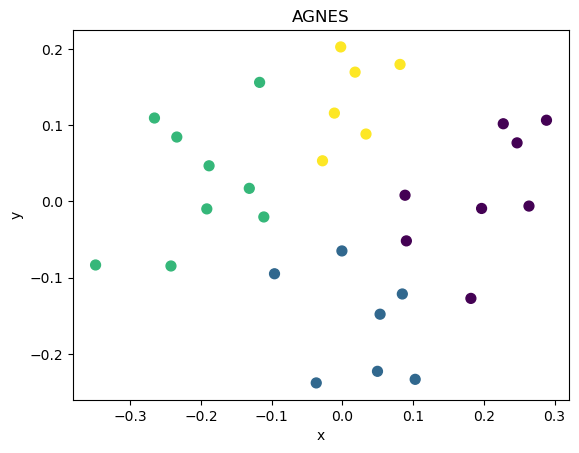

In [6]:
ag.ag_plot()